Basic model design

In [1]:
import mesa


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)

Introducing time and scheduling

In [6]:
import mesa


class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + ". My wealth is " + str(self.wealth))


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step() # randomly selects from all agents

Can iterate one step of the model as shown below:

In [7]:
empty_model = MoneyModel(10)
empty_model.step() 

Hi, I am agent 1. My wealth is 1
Hi, I am agent 5. My wealth is 1
Hi, I am agent 3. My wealth is 1
Hi, I am agent 8. My wealth is 1
Hi, I am agent 6. My wealth is 1
Hi, I am agent 2. My wealth is 1
Hi, I am agent 7. My wealth is 1
Hi, I am agent 0. My wealth is 1
Hi, I am agent 9. My wealth is 1
Hi, I am agent 4. My wealth is 1


Rewriting agent step method to undergo an exchange (random exchange of wealth)

In [8]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1


Running this model

In [16]:
model = MoneyModel(10)
for i in range(10):
    model.step()

We now want to visualise this data

(array([2., 0., 0., 0., 0., 6., 0., 0., 0., 2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

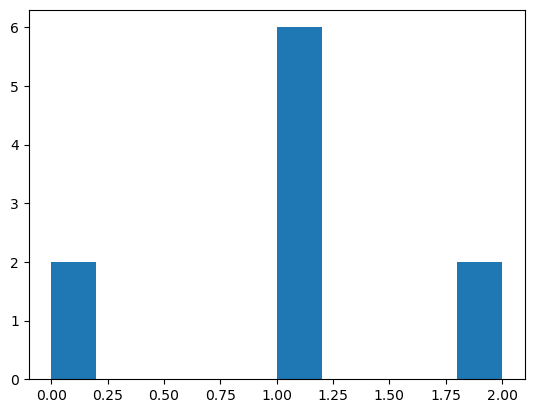

In [17]:
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

Can repeat these runs to see the distribution that emerges from them 

- This is an alternative to doing a run with many individuals

(array([442., 289., 153.,  75.,  26.,  15.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <BarContainer object of 6 artists>)

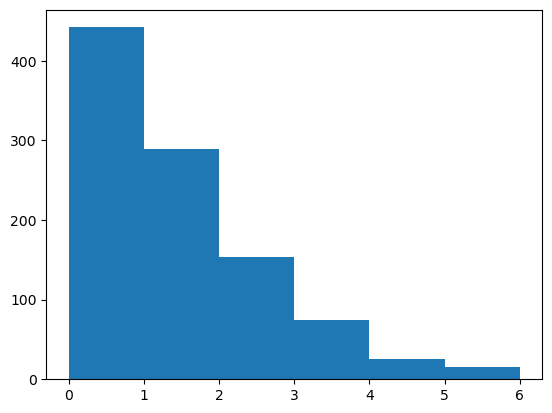

In [18]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))